<a href="https://colab.research.google.com/github/DaniGa-Mo/Challenge_TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

*   Cargar los datos directamente desde la API utilizando Python.
*   Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.




In [302]:
# Importacion de la biblioteca
import pandas as pd

# Carga de los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
# Trasformación a un DataFrame de Pandas
df = pd.read_json(url)

#🔧 Transformación



*   Explorar las columnas del dataset y verificar sus tipos de datos.
*   Consultar el diccionario para comprender mejor el significado de las variables.
*  Identificar las columnas más relevantes para el análisis de evasión.





In [303]:
# Explorando el dataset
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [304]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [305]:
# Verificar tipo de datos de las columnas
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [306]:
# Resumen estructural completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


🧪 Comprobación de incoherencias en los datos

En esta etapa se revisa la calidad del conjunto de datos, identificando problemas que puedan afectar el análisis de evasión de clientes. Se analizan valores ausentes, duplicados, errores de formato e inconsistencias en variables categóricas, con el fin de garantizar que los datos estén preparados para las siguientes etapas del proceso analítico.

In [307]:
# Normalización del dataset
df_normalizado = pd.json_normalize(
    df.to_dict(orient='records')
)

df_normalizado.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Una vez normalizado el conjunto de datos, se utilizó el método unique() para identificar los valores categóricos presentes en las variables, permitiendo detectar inconsistencias y preparar los datos para su posterior análisis.

Las columnas seleccionadas corresponden a variables clave en el análisis de evasión, ya que representan la variable objetivo, el tipo de contrato, la forma de pago y los servicios principales contratados por el cliente. Estas variables presentan un alto impacto explicativo y permiten detectar rápidamente inconsistencias que podrían afectar el análisis posterior.

In [308]:
columnas_clave = [
    # Columnas relevantes
    'Churn',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService',
    'phone.PhoneService',
    'customer.Partner',
    'customer.Dependents',
    'phone.MultipleLines',



    # Columnas para transformar
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'


]

for col in columnas_clave:
    print(f"\n{col}")
    print(df_normalizado[col].unique())



Churn
['No' 'Yes' '']

account.Contract
['One year' 'Month-to-month' 'Two year']

account.PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

internet.InternetService
['DSL' 'Fiber optic' 'No']

phone.PhoneService
['Yes' 'No']

customer.Partner
['Yes' 'No']

customer.Dependents
['Yes' 'No']

phone.MultipleLines
['No' 'Yes' 'No phone service']

internet.OnlineSecurity
['No' 'Yes' 'No internet service']

internet.OnlineBackup
['Yes' 'No' 'No internet service']

internet.DeviceProtection
['No' 'Yes' 'No internet service']

internet.TechSupport
['Yes' 'No' 'No internet service']

internet.StreamingTV
['Yes' 'No' 'No internet service']

internet.StreamingMovies
['No' 'Yes' 'No internet service']

account.PaperlessBilling
['Yes' 'No']


Mediante el uso del método unique() se detectó la presencia de valores vacíos en la variable objetivo Churn, los cuales fueron interpretados como datos faltantes. Dichos registros fueron tratados para asegurar la consistencia del análisis, mientras que el resto de las variables categóricas presentaron valores coherentes y bien definidos.

In [309]:
df_normalizado['account.Charges.Total'] = pd.to_numeric(
    df_normalizado['account.Charges.Total'], errors='coerce'
)


In [310]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [311]:
# Creando columna CUENTAS DIARIAS
df_normalizado['Cuentas_Diarias'] = (
    df_normalizado['account.Charges.Monthly'] / 30
).round(2)


In [312]:
# Verificando
df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


La variable objetivo Churn fue depurada eliminando valores vacíos y posteriormente transformada a formato binario, asignando el valor 1 a los clientes que evadieron el servicio y 0 a aquellos que permanecieron, garantizando consistencia para el análisis posterior.

In [313]:
# Estandartización y transformación de datos
import numpy as np

df_normalizado['Churn'] = (
    df_normalizado['Churn']
    .astype(str)
    .str.strip()
    .replace('', np.nan)
)


In [314]:
# Verificación
df_normalizado['Churn'].unique()


array(['No', 'Yes', nan], dtype=object)

In [315]:
# Un registro sin Churn no sirve para análisis ni modelos, por lo que se elimina
df_normalizado = df_normalizado.dropna(subset=['Churn'])


In [316]:
# Transformación
df_normalizado['Churn'] = (
    df_normalizado['Churn']
    .str.lower()
    .map({
        'yes': 1,
        'no': 0
    })
    .astype(int)
)


Las variables asociadas a servicios adicionales fueron transformadas a formato binario, considerando que los clientes sin servicio de internet o telefonía no pueden disponer de dichas funcionalidades, por lo que estos casos fueron codificados como valor negativo (0).

In [317]:
servicios = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]
map_servicios = {
    'yes': 1,
    'no': 0,
    'no internet service': 0,
    'no phone service': 0
}

#Transformación
for col in servicios:
    df_normalizado[col] = (
        df_normalizado[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map(map_servicios)
        .astype(int)
    )


In [318]:
# Transformación
binarias_simple = [
    'phone.PhoneService',
    'customer.Partner',
    'customer.Dependents',
    'account.PaperlessBilling'
]

for col in binarias_simple:
    df_normalizado[col] = (
        df_normalizado[col]
        .str.strip()        # elimina espacios
        .str.lower()        # normaliza
        .map({
            'yes': 1,
            'no': 0
        })
        .astype(int)
    )


In [319]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

Los valores faltantes en la variable de cargos totales correspondían a clientes con antigüedad nula. Estos registros fueron imputados utilizando el producto entre el cargo mensual y la antigüedad del cliente, preservando la coherencia financiera del conjunto de datos sin perder observaciones relevantes para el análisis de evasión.

In [320]:
# Se detectan valores NaN en la columna account.Chatges.Total
df_normalizado['account.Charges.Total'].isna().sum()


np.int64(11)

In [321]:
# Visualización de esas columnas
df_normalizado[df_normalizado['account.Charges.Total'].isna()][
    ['customerID','customer.tenure','account.Charges.Monthly','account.Charges.Total']
].head(20)


,customerID,customer.tenure,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


In [322]:
# Imputación de valores
mask_nan = df_normalizado['account.Charges.Total'].isna()

df_normalizado.loc[mask_nan, 'account.Charges.Total'] = (
    df_normalizado.loc[mask_nan, 'account.Charges.Monthly']
    * df_normalizado.loc[mask_nan, 'customer.tenure']
)


In [323]:
# Comprobación
df_normalizado['account.Charges.Total'].isna().sum()


np.int64(0)

In [324]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

Durante la transformación de variables categóricas se utilizaron métodos explícitos de conversión de tipos para garantizar compatibilidad con futuras versiones de Pandas y evitar comportamientos implícitos en la conversión de datos.

In [325]:
pd.set_option('display.max_columns', None)

df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

Tras la limpieza, estandarización y transformación de los datos, el conjunto final presenta variables correctamente tipificadas, sin valores faltantes y con métricas coherentes. La tabla descriptiva permite interpretar directamente proporciones en variables binarias y distribuciones en variables continuas, proporcionando una base sólida para el análisis exploratorio y la modelización de la evasión de clientes.

In [326]:
# Descripción detallada en forma de tabla
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer.Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer.Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer.tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone.PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
phone.MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
internet.OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
internet.OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
internet.DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00


Para analizar la distribución de la evasión de clientes, se construyó un subconjunto del dataset que contiene exclusivamente la variable Churn, facilitando su exploración y visualización.

In [328]:
# Analizando la columna evación
df_churn = df_normalizado[['Churn']]

df_churn.head()




,Churn
0,0
1,0
2,1
3,1
4,1


In [330]:
# Importación de biblioteca
import matplotlib.pyplot as plt



In [332]:
# Valores
churn_counts = df_churn.value_counts().sort_index()

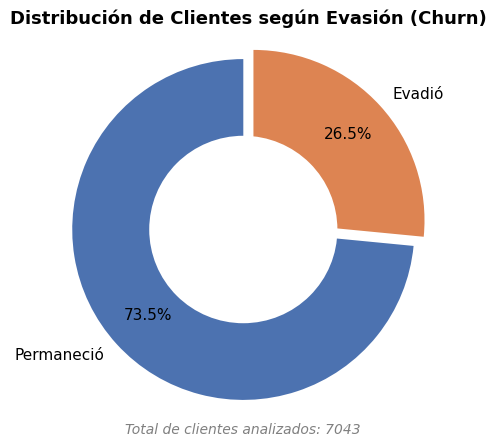

In [340]:
# Gráfico
labels = ['Permaneció', 'Evadió']
sizes = churn_counts

# Colores profesionales
colors = ['#4C72B0', '#DD8452']  # azul / naranja
explode = (0, 0.08)  # resalta evasión suavemente

plt.figure(figsize=(5,5))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    pctdistance=0.75,
    textprops={'fontsize': 11}
)

# Círculo central para aspecto limpio
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
plt.gca().add_artist(centre_circle)

plt.title(
    'Distribución de Clientes según Evasión (Churn)',
    fontsize=13,
    fontweight='bold'
)
plt.text(0, -1.2, f'Total de clientes analizados: {sum(sizes)}',
         ha='center', fontsize=10, color='gray', style='italic')

plt.axis('equal')
plt.show()

El gráfico de pizza muestra la distribución de clientes según su estado de evasión. Se observa que aproximadamente un 26,5 % de los clientes abandonaron el servicio, lo que representa una proporción significativa y justifica el análisis de los factores asociados al churn.

#📄Informe final